In [183]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [184]:
import csv
import urllib2
from collections import namedtuple

# Create a namedtuple constructor for each record in the Iris data
#    1. sepal length in cm
#    2. sepal width in cm
#    3. petal length in cm
#    4. petal width in cm
#    5. class: 
#       -- Iris-setosa
#       -- Iris-versicolour
#       -- Iris-virginica
fields = ('sepal_length', 
          'sepal_width', 
          'petal_length', 
          'petal_width', 
          'species')
IrisRecord = namedtuple('IrisRecord', fields)

# Download and read in the data from the UCI Machine Learning Repository
response = urllib2.urlopen('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')
iris_data_csv = response.read().strip()

# Convert each record into a format that's easier to work with (i.e.,
# wrap each record in the namedtuple that we created).
data = []
for row in csv.reader(iris_data_csv.splitlines()):
    data.append(IrisRecord(
        sepal_length          = float(row[0]),
        sepal_width           = float(row[1]),
        petal_length          = float(row[2]),
        petal_width           = float(row[3]),
        species               = row[4]))

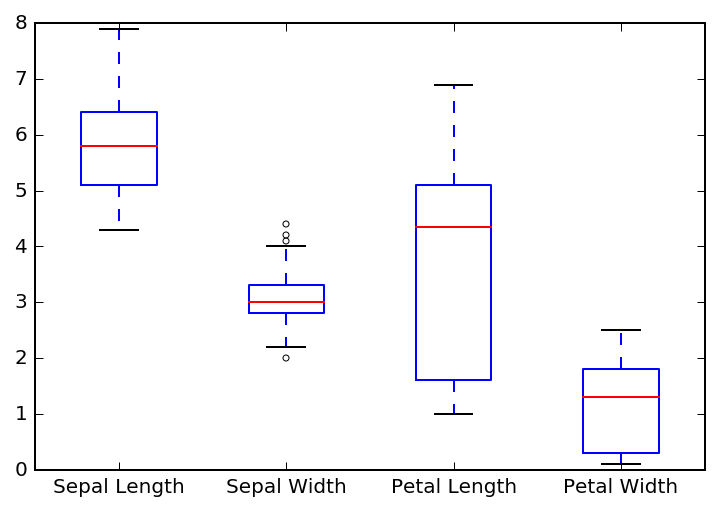

In [185]:
# Convert the Iris data into a 2-dimensional matrix 
# where each column is one feature in the data set.
x = np.column_stack([
    [r.sepal_length for r in data],
    [r.sepal_width for r in data],
    [r.petal_length for r in data],
    [r.petal_width for r in data],
])

# Plot the data. We are changing the look of the outliers (aka, fliers),
# one of the many configurable bits of the boxplot.
plt.boxplot(x, flierprops={'marker':'o',                    # Mark outliers with a circle
                           'markerfacecolor':'none',        # Empty circles (i.e., no color) 
                           'color': 'none',                 # Remove the outlier lines
                           'markersize':3                   # Reduce the size of the ourlier markers
                          })

# Add the x-axis labels offset by 1 so they line up with
# each of the box plots.
names = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
plt.xticks(range(1, len(names)+1), names);

In [ ]:
from itertools import cycle
from collections import defaultdict

# Create a color map of species names to colors
color_cycler = cycle(plt.rcParams['axes.prop_cycle'])
cmap = defaultdict(lambda: next(color_cycler)['color'])

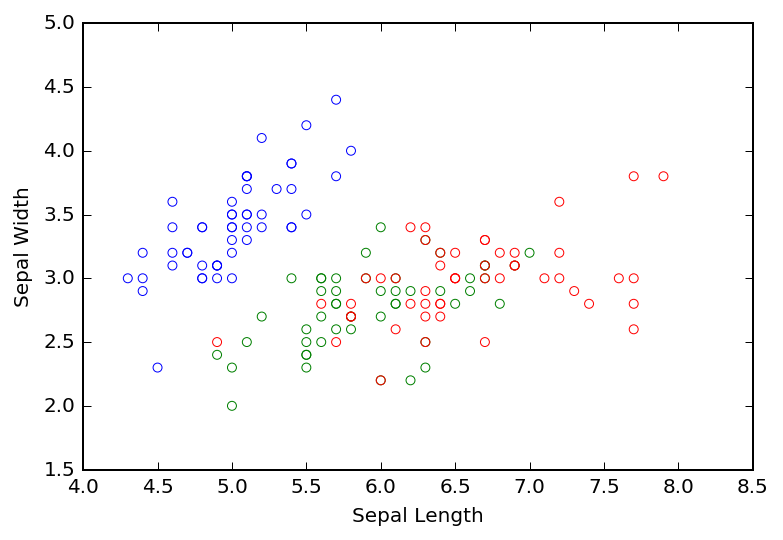

In [188]:
# Extract the x and y values (i.e., sepal length and width)
# from the data set. Also, create a list of corresponding
# colors based on the species of each record.
sepal_length, sepal_width, colors = [], [], []
for r in data:
    sepal_length.append(r.sepal_length)
    sepal_width.append(r.sepal_width)
    colors.append(cmap[r.species])
    
# Plot the data on a scatter plot. Each point will have an outline 
# color according to their species, but we'll leave the centers 
# colorless (for aesthetic purposes only). Finally, we'll reduce
# the line width of each data point (again for aesthetics only).
plt.scatter(sepal_length, sepal_width, edgecolors=colors, c='none', linewidths=0.5)

# Add x and y labels
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width');

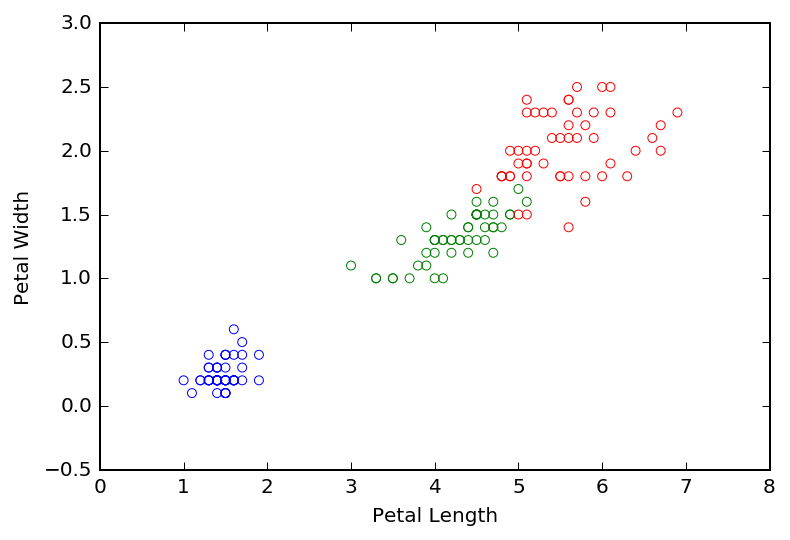

In [189]:
# Extract the x and y values (i.e., petal length and width)
# from the data set. Also, create a list of corresponding
# colors based on the species of each record.
petal_length, petal_width, colors = [], [], []
for r in data:
    petal_length.append(r.petal_length)
    petal_width.append(r.petal_width)
    colors.append(cmap[r.species])
    
# Plot the data on a scatter plot. Each point will have an outline 
# color according to their species, but we'll leave the centers 
# colorless (for aesthetic purposes only). Finally, we'll reduce
# the line width of each data point (again for aesthetics only).
plt.scatter(petal_length, petal_width, edgecolors=colors, c='none', linewidths=0.5)

# Add x and y labels
plt.xlabel('Petal Length')
plt.ylabel('Petal Width');

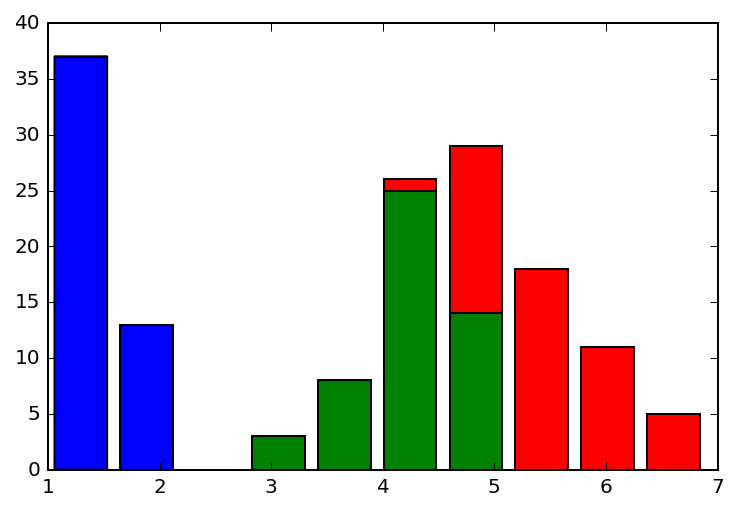

In [190]:
# Split the data set up into one list per species
setosa = [r.petal_length for r in data if r.species == 'Iris-setosa']
versicolor = [r.petal_length for r in data if r.species == 'Iris-versicolor']
virginica = [r.petal_length for r in data if r.species == 'Iris-virginica']

# Create a list of colors (one per species)
colors = [cmap['Iris-setosa'], cmap['Iris-versicolor'], cmap['Iris-virginica']]

# Plot a stacked histogram
plt.hist([setosa, versicolor, virginica], color=colors, histtype='barstacked');

### Parallel Coordinates

Another technique for visualizing clusters in your data is a technique called [parallel coordinates][1]. Though, the matplotlib library doesn't come with a function for plotting parallel coordinates, we can create a close facsimile with relatively little work. Step one is to plot the data and that's pretty easy, all we need to do is plot each row in the data set as a line in the graph. The only tricky part is mapping the color of the 

[1]: https://eagereyes.org/techniques/parallel-coordinates
[2]: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists


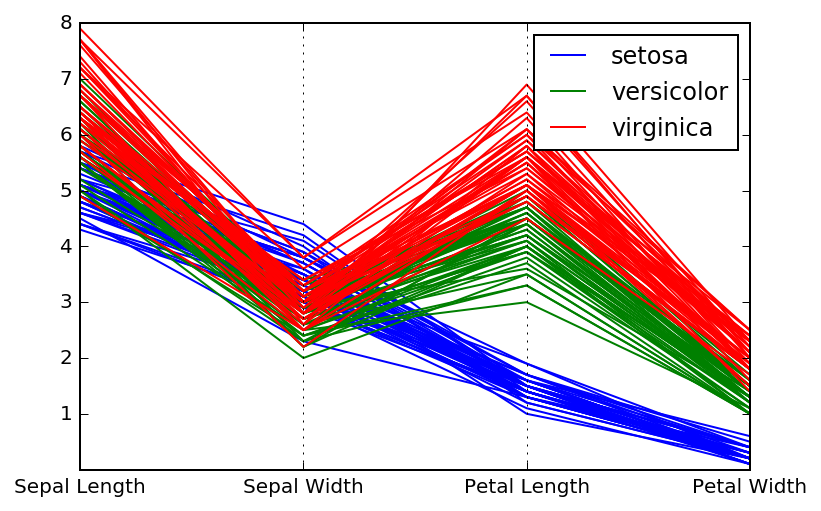

In [192]:
# Plot the data, one line for each record in the data set.
# Remember calling plot continuously works because pyplot
# keeps track of the current figure and adds a new line
# to the current figure every time you call plot.
for record in data:
    plt.plot(record[:4], c=cmap[record.species])
    
# Label the x-axis with the name of each feature in the data set.
names = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
plt.xticks(range(len(names)), names)

# Set the y-axis ticks. We're doing this just to remove the tick
# label for 0 since it looks a bit cluttered with the x-axis labels
plt.yticks(range(1, 9))

# Show the grid lines for the x-axis
plt.grid(axis='x')

# Create a few "proxy artists" for creating the legend. Calling the 
# legend() function without passing in any parameters will create a
# legend for any labeled data in the graph, so we could do something
# funky where we add a label for one line per species, but that 
# doesn't seem as simple and clean as just creating a few lines that
# we use just to create the legend. Plus, this is an officially 
# sanctioned way to create a legend (just see the legend docs).
legend_handles = [
    plt.Line2D([], [], color=cmap['Iris-setosa'], label='setosa'),
    plt.Line2D([], [], color=cmap['Iris-versicolor'], label='versicolor'),
    plt.Line2D([], [], color=cmap['Iris-virginica'], label='virginica')
]
plt.legend(handles=legend_handles);